Number of words:  77
[('thì', 4), ('uống', 3), ('lần', 3), ('ngọt', 2), ('có', 2), ('giá', 2), ('kem', 2), ('matcha', 2), ('trà', 2), ('sữa', 2), ('mình', 2), ('đồ', 1), ('ko', 1), ('gì', 1), ('đặc_sắc', 1), ('làm', 1), ('hương_vị', 1), ('riêng', 1), ('khá', 1), ('cao', 1), ('ạ', 1), ('mua', 1), ('mang', 1), ('về', 1), ('kcây', 1), ('ly', 1), ('trân_châu', 1), ('củ', 1), ('năng', 1), ('kêu', 1), ('vs', 1), ('k', 1), ('mà', 1), ('chất_lượng', 1), ('theo', 1), ('tệ', 1), ('ghé', 1), ('đc', 1), ('take', 1), ('away', 1), ('rùi', 1), ('à', 1), ('quên', 1), ('đầu', 1), ('cầu_vồng', 1), ('cũng', 1), ('tạm', 1), ('vì', 1), ('phủ', 1), ('lên', 1)]


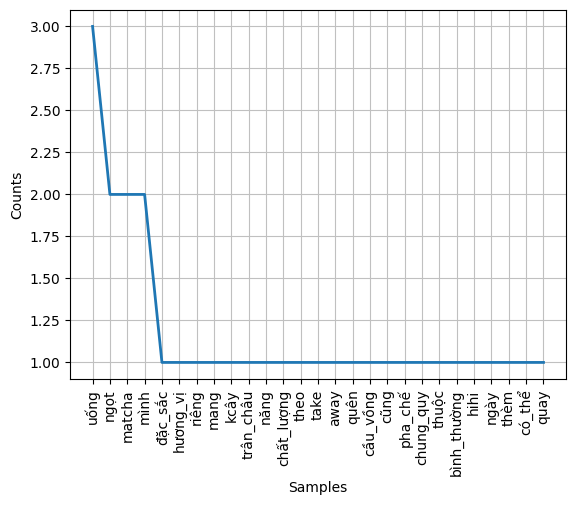

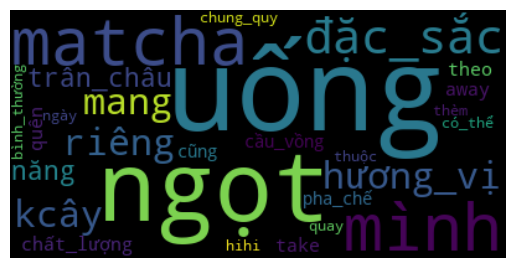

In [1]:
import nltk
import re
import os
from nltk.probability import FreqDist
from nltk.corpus import stopwords


#Read folder
src='D:/khai pha web/Data_Preprocessing/'
path=os.listdir(src)
for i in path:
    label=i.split("'")[0]
    f=open('D:/khai pha web/Data_Preprocessing/'+str(label), "r", encoding="utf-8")
    text=f.read()

#################################
######## Text Processing ########
#################################
text_pre=text.replace("\n","")  # Remove the newline command
text_pre=text.lower() # Convert text to lowercase
text_pre=re.sub(r'[^\w\s]','',text_pre) # Remove punctuation
text_pre = re.sub("\d+", " ", text_pre) # Remove number
text_pre = re.sub(r"[!@#$[]()]'", "", text_pre) # Remove character: !@#$[]()
stop = stopwords.words('english')   # Remove StopWords
text_pre = " ".join(text_pre for text_pre in text_pre.split() if text_pre not in stop)
text_pre=nltk.word_tokenize(text_pre) # Tokenizing


#################################
##### Exploring Text Data #######
#################################
#print("List of Datasets:",text_pre)
print("Number of words: ",len(text_pre))

# Compute the frequency of all words
frequency_dist = FreqDist(word.lower() for word in text_pre)

## show only th top 50 results
print(frequency_dist.most_common(50))


## Consider words with length greater than 3 and plot
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)


## Build a word cloud
# install library
# pip install wordcloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()